# Lprec
Demonstration of functionality for computing the Radon transform and backprojection via the log-polar-based method. Pure python version.

In [1]:
import sys
sys.path.append("../build/lib/")
import lprecmods.lpTransform as lpTransform
import matplotlib.pyplot as plt
from numpy import *
import struct

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Specify parameters for the Radon transform

In [3]:
N=512
Nproj=3*N/2 # number of projections
Nslices=1 # number of slices
filter_type='None' # filter for inversion 
pad=False # padding
cor=N/2 # center of rotation

Read function and its filtered Radon data

In [4]:
fid = open('./data/f', 'rb')
f=float32(reshape(struct.unpack(N*N*'f',fid.read(N*N*4)),[Nslices,N,N]))

fid = open('./data/R', 'rb')
R=float32(reshape(struct.unpack(Nproj*N*'f',fid.read(Nproj*N*4)),[Nslices,N,Nproj]))

Plot function

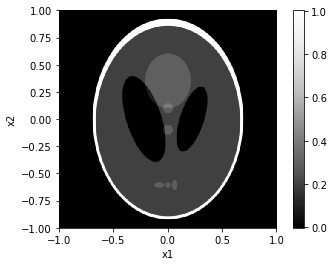

In [5]:
plt.imshow(f[0,:,:],extent=(-1,1,-1,1), cmap='Greys_r')
plt.ylabel('x2')
plt.xlabel('x1')
plt.colorbar()
plt.show()

Plot filtered Radon data

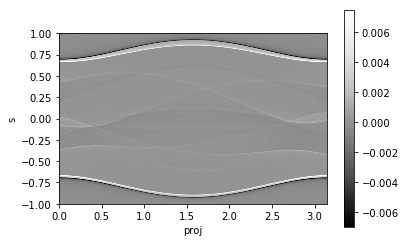

In [6]:
plt.imshow(R[0,:,:],extent=(0,pi,-1,1), cmap='Greys_r')
plt.ylabel('s')
plt.xlabel('proj')
plt.colorbar()
plt.show()

Create a lprec class with precomputed parameters

In [7]:
clpthandle=lpTransform.lpTransform(N,Nproj,Nslices,filter_type,pad)
clpthandle.precompute()

Compute the Radon transform for the input function f

In [8]:
Rf=clpthandle.fwd(f)

Plot the result

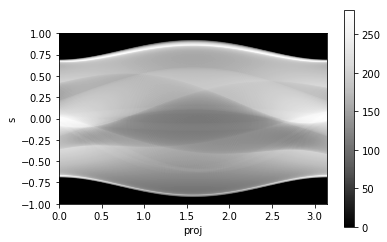

In [9]:
plt.imshow(Rf[0,:,:],extent=(0,pi,-1,1), cmap='Greys_r')
plt.ylabel('s')
plt.xlabel('proj')
plt.colorbar()
plt.show()

Compute backprojection for the input Radon data R

In [10]:
frec=clpthandle.adj(R,cor);

Plot the result

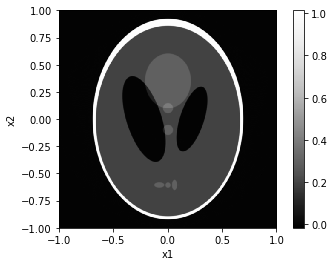

In [11]:
plt.imshow(frec[0,:,:],extent=(-1,1,-1,1), cmap='Greys_r')
plt.ylabel('x2')
plt.xlabel('x1')
plt.colorbar()
plt.show()

Check the error for the backprojection

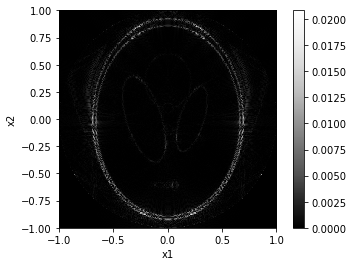

In [12]:
plt.imshow(abs(f[0,:,:]-frec[0,:,:]),extent=(-1,1,-1,1), cmap='Greys_r')
plt.ylabel('x2')
plt.xlabel('x1')
plt.colorbar()
plt.show()

Adjoint test

In [13]:
Rrec=clpthandle.fwd(frec)
sum1= sum(ndarray.flatten(Rrec)*ndarray.flatten(R))
sum2= sum(ndarray.flatten(frec)*ndarray.flatten(frec))
print linalg.norm(sum1-sum2)/linalg.norm(sum2)

0.00106818
